# Exploratory Data Analysis of Movie Datasets

## Introduction

As a data scientist, have been tasked by **Microsoft** to conduct an **exploratory data analysis** (EDA) to generate insights on the movie industry. The project involves analyzing *six movie datasets* to provide insights and recommendations.

<img src="image.jpeg" width="800" height="400">

# Business Understanding

 Microsoft have decided to create a new movie studio. Unfortunately, they have limited knowledge about creating movies. They need to gain understanding into the movie industry, such as the relationships between production budgets, revenues, ratings, genres and other key factors that contribute to the success of a movie.
 
 The goal of this project is to help Microsoft make data-driven decisions that will give them and opportunity to succeed in the highly competitive movie production industry.

## Data Understanding

### IMDb

The IMDb database is a comprehensive database containing information on movies content. It contains data on numerous titles and is organized into 8 tables;
- `persons`
- `writers`
- `directors`
- `known_for`
- `principals`
- `movie_basics`
- `movie_rating` 
- `movie_akas`

Below is the database's Entity Relationship Diagram 

<img src="movie_data_erd.jpeg" width="800" height="600">

# 1. What insights can we get using the genres in the movie industry?

Possible genre analysis
- Genres frequency distribution
- Number of votes per genre
- Average rate per genre

IMDb database can be used to analyse the most popular genres in the movie industry and generate a frequency distribution of genres across all movies in the `movie_basics` table.
To understand the number of votes and average rate for each genre, we'll include the `movie_ratings`.
 

## Data Understanding

Each record in the `movie_basics` and `movie_ratings` represents a single movie. There are approximately 146,000 and 74,000 movie records in the respective table.

The columns from `movie_basics` table provides 6 basic information about each movie:
- `movie_id`
- `primary_title`
- `original_title`
- `start_year`
- `runtime_minutes`
- `genres`

Features in `movie_ratings`:
- `movie_id`
- `averagerating`
- `numvotes`

However our focus will be on `movie_id` feature which represents their ID, `genres` column which contains the genre or genres of the movie, separated by vertical bar (`|`), `average_id` which gives the average ratings per movie, and finally `numvotes` which represents number of votes per genre.

## Requirements

- load dataset
- Perform Data Cleaning Required
- Data Aggregation
- Visualization
- Answer the question



Loading the necessary libraries, `pandas`, `numpy`, `sqlite3` and `seaborn`


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Establishing a connection to the database `Data/im.db`, called `conn`

In [2]:
conn = sqlite3.connect('Data/im.db')

Viewing the table names

In [3]:
q = """
SELECT name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql(q, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Getting the required columns from the tables and call DataFrame `rate_genre`

In [4]:
q = """
SELECT movie_id,
       genres,
       averagerating,
       numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
"""
rate_genre = pd.read_sql(q, conn)
print(rate_genre.info())
rate_genre.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   genres         73052 non-null  object 
 2   averagerating  73856 non-null  float64
 3   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB
None


,movie_id,genres,averagerating,numvotes
0,tt0063540,"Action,Crime,Drama",7.0,77
1,tt0066787,"Biography,Drama",7.2,43
2,tt0069049,Drama,6.9,4517
3,tt0069204,"Comedy,Drama",6.1,13
4,tt0100275,"Comedy,Drama,Fantasy",6.5,119


#### **Data Cleaning**

Checking for **missing values**

In [5]:
def identifying_missing_values(data):
    """Identify if the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out

def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing

In [6]:

identifying_missing_values(rate_genre)

The Data has missing values.


In [7]:
missing_data = missing_values(rate_genre)
missing_data

,Missing Values,Percentage(%)
genres,804,0.010886


The `genres` column has 804 missing values which make up only 1% of the dataset. **Dropping the rows** is a safe choice here since our analysis is entirely based on the genres and replacing them with the most frequent value may alter our output accuracy

In [8]:
rate_genre.dropna(inplace=True)
identifying_missing_values(rate_genre)

The Data has no missing values


Proceeding to check for **duplicates**

In [9]:
def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(rate_genre)

The Data has no duplicates


Inspect the column **data types**

In [10]:
rate_genre.dtypes

movie_id          object
genres            object
averagerating    float64
numvotes           int64
dtype: object

Checking for **numeric placeholders**

In [14]:
rate_genre[['averagerating', 'numvotes']].describe()

,averagerating,numvotes
count,73052.000000,7.305200e+04
mean,6.330930,3.562173e+03
std,1.474699,3.045804e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,5.000000e+01
75%,7.400000,2.890000e+02
max,10.000000,1.841066e+06


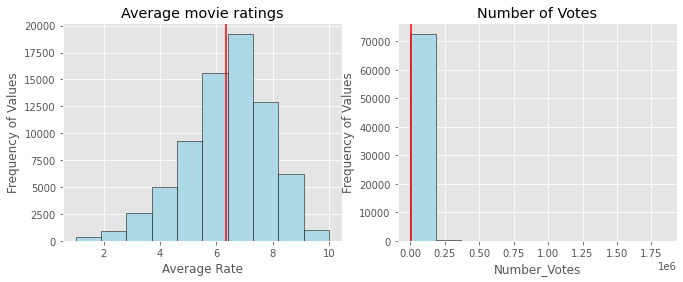

In [30]:
plt.style.use('ggplot') #grid view on plot
# Create the plot
fig, (ax1, ax2) = plt.subplots(figsize = (11, 4), ncols = 2)

# Plot `avaragerating` bar plot
ax1.hist(rate_genre.averagerating, edgecolor = 'black', color = 'lightblue')
# Adding a vertical line which represent the mean
ax1.axvline(np.mean(rate_genre.averagerating), color = 'red', label = 'Average of averagerating')
# Set x and y axes lables and the title
ax1.set_xlabel('Average Rate')
ax1.set_ylabel('Frequency of Values')
ax1.set_title('Average movie ratings')

# Plot `numvotes` bar plot
ax2.hist(rate_genre.numvotes, bins = 10, edgecolor = 'black', color = 'lightblue')
# Adding a vertical line which represent the mean
ax2.axvline(np.mean(rate_genre.numvotes), color = 'red', label = 'Average of number of votes')
# Set x and y axes lables and the title
ax2.set_xlabel('Number_Votes')
ax2.set_ylabel('Frequency of Values')
ax2.set_title('Number of Votes');

Everything looks okay so far.

But, The `genres` column needs more attention. Some of the entries represents more than one genres.

Using `rate_genre.explode()`

In [42]:
rate_genre['genres'] = rate_genre['genres'].str.split(',')
rate_genre = rate_genre.explode('genres')
rate_genre.head(10)

,movie_id,genres,averagerating,numvotes
0,tt0063540,Action,7.0,77
0,tt0063540,Crime,7.0,77
0,tt0063540,Drama,7.0,77
1,tt0066787,Biography,7.2,43
1,tt0066787,Drama,7.2,43
2,tt0069049,Drama,6.9,4517
3,tt0069204,Comedy,6.1,13
3,tt0069204,Drama,6.1,13
4,tt0100275,Comedy,6.5,119
4,tt0100275,Drama,6.5,119
